# Genetic Linear Regression with Numpy
A solution... via evolution!

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
sample_num = 10
beta_true = [2, 3]
x_obs = np.random.normal(25, 10, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(0, 10, sample_num)

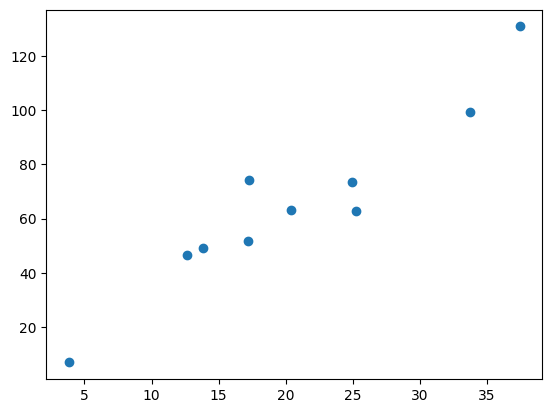

In [65]:
plt.scatter(x_obs, y_obs);

In [34]:
def rmse_fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [35]:
def rank(betas, rmse_fitness):
    scored = np.column_stack((betas, np.apply_along_axis(rmse_fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [36]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [37]:
def mate(survivors, gen_size):    
    rank_weighting = np.linspace(1, 0, survivors.shape[0])
    rank_weighting /= rank_weighting.sum()

    sampled_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True, p=rank_weighting)
    sampled_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True, p=rank_weighting)
    sampled_betas = np.column_stack((sampled_b0, sampled_b1))

    # mutation
    mutation = np.random.normal(0, 1, (gen_size, 2))
    
    # next generation
    new_betas = sampled_betas + mutation

    return new_betas

In [38]:
beta = np.random.normal(-10,10, 2)
beta

array([-15.87651618,   3.10380219])

In [39]:
rmse_fitness([ 18.54413807,   3.36654949])

np.float64(8.846055278850946)

In [40]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[-10.0213974 , -12.70293347],
       [ -7.57560965, -10.94865008],
       [ -8.44335752, -12.46158577],
       [ -0.25670396,   0.35917515],
       [ -6.48183135, -22.8306859 ],
       [  6.535151  ,   4.10809764],
       [  4.29533584,   1.5227312 ],
       [  2.58786661,   5.34114602],
       [  8.13221577,  -1.39746905],
       [ -3.82509448,  20.47836831]])

In [41]:
ranked = rank(betas, rmse_fitness)
ranked

array([[ 6.53515100e+00,  4.10809764e+00,  9.30741027e+00],
       [ 2.58786661e+00,  5.34114602e+00,  4.41208454e+01],
       [ 4.29533584e+00,  1.52273120e+00,  7.82757475e+01],
       [-2.56703956e-01,  3.59175147e-01,  1.20276273e+02],
       [ 8.13221577e+00, -1.39746905e+00,  1.69083246e+02],
       [-7.57560965e+00, -1.09486501e+01,  4.93473922e+02],
       [-3.82509448e+00,  2.04783683e+01,  5.27923946e+02],
       [-8.44335752e+00, -1.24615858e+01,  5.43305209e+02],
       [-1.00213974e+01, -1.27029335e+01,  5.52643643e+02],
       [-6.48183135e+00, -2.28306859e+01,  8.77204807e+02]])

In [42]:
survivors = select(ranked, 0.2)
survivors

array([[ 6.535151  ,  4.10809764,  9.30741027],
       [ 2.58786661,  5.34114602, 44.12084541]])

In [43]:
sampling_weights = np.linspace(1, 0, survivors.shape[0])
sampling_weights /= sampling_weights.sum()
sampling_weights

array([1., 0.])

In [44]:
np.random.normal(survivors[0,0], 3, 5)

array([ 9.79081786,  7.2312092 ,  6.91394722, 11.63641491,  5.3204957 ])

In [45]:
gen_size = 100
betas = np.random.uniform(-1, 1, (gen_size, 2))
best_fit = []
verbose = True
for gen in range(5):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, rmse_fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(f"survivors:\n {survivors}")
    
    # crossover and mutation -> next generation
    betas = mate(survivors, gen_size)

    if verbose:
        print(f"next betas: \n {betas[:10]}")
        print('\n')

# print(betas[:10])


Generation: 0
survivors:
 [[-2.17487539e-01  9.80602379e-01  1.00129408e+02]
 [-6.20962547e-01  9.91550802e-01  1.00162582e+02]
 [-1.14207595e-01  9.52980831e-01  1.00923949e+02]
 [-7.39112764e-01  9.51904524e-01  1.01558835e+02]
 [-6.72694836e-01  9.29978333e-01  1.02204491e+02]
 [-9.56715928e-01  9.25767815e-01  1.02613554e+02]
 [ 3.44844956e-01  8.80120347e-01  1.02840734e+02]
 [-7.88471619e-01  8.91372291e-01  1.03564867e+02]
 [-1.03845809e-01  8.59241310e-01  1.03947026e+02]
 [ 5.80382386e-01  8.36681477e-01  1.04020181e+02]
 [-6.70512700e-01  8.36148069e-01  1.05238477e+02]
 [ 4.69622193e-01  7.90309121e-01  1.05626929e+02]
 [-4.56853134e-01  7.63041692e-01  1.07398845e+02]
 [-2.27974112e-01  7.31528245e-01  1.08198749e+02]
 [-2.98007100e-01  7.31746825e-01  1.08258940e+02]
 [ 8.58277056e-03  7.13414538e-01  1.08557708e+02]
 [-8.73220666e-01  6.70925276e-01  1.10779745e+02]
 [-5.22729998e-02  6.41677116e-01  1.10937538e+02]
 [-6.65420888e-01  6.55421128e-01  1.11081793e+02]
 [-3.

In [46]:
best_fit

[np.float64(100.12940779750498),
 np.float64(45.12085622239067),
 np.float64(4.582907548492669),
 np.float64(4.137184939835678),
 np.float64(4.301584461434594)]

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reshape the array to be 2D
X_reshaped = x_obs.reshape(-1, 1) 

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_reshaped, y_obs)

print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)

Slope (Coefficient): [4.73202155]
Intercept: -18.086933690799626
